# Introducción

En el modelo de regresión lineal simple nos preocupa estimar los parámetros poblacionales $\beta_0$ y $\beta_1$. Donde, con base en el supuesto de que conocemos el modelo subyacente, intentamos dar una relación causal:

$$y_i = \beta_0 + \beta_1 x_i + u_i$$

Debemos encontrar estimadores de $\beta_0$ y $\beta_1$ dado una muestra de tamaño N. Por lo que para encontrar la mejor recta que se ajuste a los datos debemos minimizar la varianza del movimiento de $y_i$ del componente no sistemático o maximizar la información del componente sistemático.

Para este cuaderno buscaremos minimizar el componente no sistemático:

$$\min \sum u_i^2$$

De esta forma podemos definir la suma de cuadrados residuales (SCR) de la siguiente forma:

$$S_T(\beta) = \sum_{t=1}^N (y_i - \beta_0 - \beta_1 x_i)^2 $$

El estimador de Minimos Cuadrados Ordinarios (MCO) que minimiza $S_T(\beta)$ es:

\begin{align}
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_2 \bar{x}\\
\hat{\beta}_1 &= \frac{\sum_{t=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{t=1}^N (x_i - \bar{x})^2} = \frac{\text{Cov}(x,y)}{\text{Var}(x)}
\end{align}

Con base en estos parámetros estimados, la recta de regresión MCO es:

$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$

Ciertamente los estimadores de los parámetros y el residuo de la regresión $(\hat{u} = y - \hat{y})$ tienen sus propiedades; sin embargo, no es el objetivo de este cuaderno meternos a fondo con la teoría econométrica.

Como se puede observar para calcular los parámetros solo debemos calcular algunos estadísticos descriptivos, que son $\bar{y}, \bar{x}, \text{Cov}(x,y), \text{Var}(x)$ y, sustituir en las ecuaciónes encontradas.


# Data: CEO Salary and Return on Equity

## Wooldridge, Ejemplo 2.3

Para ejemplificar esto, usaremos los datos de <font color = red> CEOSAL1 </font>, tal cual lo hace el ejemplo 2.3 "CEO Salary and Return on Equity":

$$\text{salary} = \beta_0 + \beta_1 \text{roe} + u$$


donde $\text{salary}$ es el salario de un director ejecutivo en miles de dólares y $\text{roe}$ es el retorno de la inversión en porcentaje. Con esto podemos calcular las estadísticas necesarias para poder reproducir los estimadores vía MCO.

In [1]:
import wooldridge as woo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

In [2]:
# Cargar datos
ceosal1 = woo.dataWoo('ceosal1')
ceosal1

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


In [3]:
# Extraemos de nuestro Data Frame los variables de interes
x = ceosal1['roe']
y = ceosal1['salary']

In [4]:
# Reproducimos las formulas
cov_xy = np.cov(x, y)[1, 0] # Accedemos a la fila 2 y columna 1 de la matriz
var_x = np.var(x, ddof=1) # Corregimos por grados de libertad el sesgo (ddof)
x_bar = np.mean(x)
y_bar = np.mean(y)
# Calculo manual de los coeficientes MCO
b2 = cov_xy / var_x
b1 = y_bar - (b2 * x_bar)

print(f'b1: {b1}')
print(f'b2: {b2}')

b1: 963.1913364725579
b2: 18.501186345214922


Una manera más eficiente de calcular los estimadores del modelo de regresión lineal, es usando el módulo <span style="background-color: #D3D3D3; padding: 2px;">**statsmodels**</span>, este módulo contiene todas las operaciones de análisis y modelado estadístico (aunque nunca viene mal programarlo por uno mismo para comprender el funcionamiento interno de estas paqueterías). Este módulo contiene tanto, submódulos, clases y funciones que uno puede mandar a llamar para realizar las operaciones de su interés.
Para este caso usaremos <span style="background-color: #D3D3D3; padding: 2px;">**statsmodels.formula.api**</span> que nos brinda una interfaz más declarativa y fácil de usar, al contener métodos ya expresados como fórmulas matemáticas al estilo R. Por otra parte esta, <span style="background-color: #D3D3D3; padding: 2px;">**statsmodels.api**</span>, que nos permite trabajar directamente con las clases, proporcionando mayor flexibilidad.

In [5]:
import statsmodels.formula.api as smf

In [6]:
reg = smf.ols(formula='salary ~ roe', data=ceosal1) #instanciamos la clase
results = reg.fit() #usamos el método fit y guardamos todos los resultados
b = results.params #usamos la propiedad params del objeto results
print(f'b: \n{b}\n')

b: 
Intercept    963.191336
roe           18.501186
dtype: float64



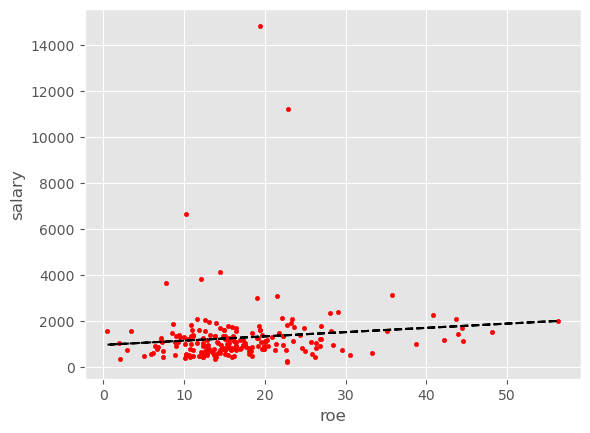

In [7]:
# scatter plot and fitted values:
plt.scatter('roe', 'salary', data=ceosal1, color='red', marker='.')
plt.plot(ceosal1['roe'], results.fittedvalues, color='black', linestyle='--') #usar propiedad fittedvalues para y_hat
plt.ylabel('salary')
plt.xlabel('roe')
plt.show()

## Wooldridge, Ejemplo 2.6

Como se observó, con la instancia de clase que creamos (results), podemos acceder a sus distintas propiedades y métodos de la clase "ols". Y con esto tener diferentes estadísticos de interés, como los estimadores de $\beta_0$ y $\beta_1$
Dadas estas estimaciones de parámetros, calcular los valores predichos se torno damasiado fácil::

\begin{align}
\hat{y}_i &= \hat{\beta}_0 + \hat{\beta}_1 x_i \\
\hat{u}_i &= y_i - \hat{y}_i
\end{align}

Por lo tanto, procederemos a calcular los valores predichos para el ejemplo 2.6 del libro:

In [8]:
# Obtener los valores predichos y los residuales:
salary_hat = results.fittedvalues
u_hat = results.resid

In [9]:
# Wooldridge, Table 2.2:
table = pd.DataFrame({'roe': ceosal1['roe'],
                    'salary': ceosal1['salary'],
                    'salary_hat': salary_hat,
                    'u_hat': u_hat})
print(f'table.head(15): \n{table.head(15)}\n')

table.head(15): 
          roe  salary   salary_hat       u_hat
0   14.100000    1095  1224.058071 -129.058071
1   10.900000    1001  1164.854261 -163.854261
2   23.500000    1122  1397.969216 -275.969216
3    5.900000     578  1072.348338 -494.348338
4   13.800000    1368  1218.507712  149.492288
5   20.000000    1145  1333.215063 -188.215063
6   16.400000    1078  1266.610785 -188.610785
7   16.299999    1094  1264.760660 -170.760660
8   10.500000    1237  1157.453793   79.546207
9   26.299999     833  1449.772523 -616.772523
10  25.900000     567  1442.372056 -875.372056
11  26.799999     933  1459.023116 -526.023116
12  14.800000    1339  1237.008898  101.991102
13  22.299999     937  1375.767778 -438.767778
14  56.299999    2011  2004.808114    6.191886



Podemos comporbar algunas propiedades que nos da el modelo de regresión de MCO, las cuales son:

\begin{align}
\sum_{i=1}^N \hat{u}_i = 0 &\Rightarrow \bar{\hat{u}} = 0 \\
\sum_{i=1}^N x_i \hat{u}_i = 0 &\Rightarrow \text{Cov}(x_i,\hat{u}_i) = 0 \\
\bar{y} &= \hat{\beta}_0 + \hat{\beta}_1 \bar{x} 
\end{align}

In [10]:
# Confirmar proposicion 1:
u_hat_mean = np.mean(u_hat)
print(f'u_hat_mean: {u_hat_mean}\n')

# Confirmar proposicion 2:
roe_u_cov = np.cov(ceosal1['roe'], u_hat)[1, 0]
print(f'roe_u_cov: {roe_u_cov}\n')

# Confirmar proposicion 3:
roe_mean = np.mean(ceosal1['roe'])
salary_pred = b[0] + b[1] * roe_mean
print(f'salary_pred: {salary_pred}\n')
salary_mean = np.mean(ceosal1['salary'])
print(f'salary_mean: {salary_mean}\n')

u_hat_mean: -1.3054947872338683e-13

roe_u_cov: -7.794107239953099e-13

salary_pred: 1281.1196172248806

salary_mean: 1281.1196172248804



## Wooldridge, Ejemplo 2.8

### Bondad de ajuste

La suma de cuadrados total (SCT), suma de cuadrados explicada (SCE) y suma de cuadrados residual (SCR). Se puede escribir como:

\begin{align}
\text{SCT} &= \sum_{i=1}^n (y_i - \bar{y})^2 = (n-1)\text{Var}(y)\\
\text{SCE} &= \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 = (n-1)\text{Var}(\hat{y})\\
\text{SCR} &= \sum_{i=1}^n (\hat{u}_i - 0)^2 = (n-1)\text{Var}(\hat{u})
\end{align}
Y con esto definir el $R^2$ como:
\begin{align}
R^2 &= \frac{\text{SCE}}{\text{SCT}} = 1 - \frac{\text{SCR}}{\text{SCT}} \\
R^2 &= \frac{\text{Var}(\hat{y})}{\text{Var}(y)} = 1 - \frac{\text{Var}(\hat{u})}{\text{Var}(y)}
\end{align}

In [11]:
# Calculamos R^2 de tres diferentes formas:
salary = ceosal1['salary']
R2_a = np.var(salary_hat, ddof=1) / np.var(salary, ddof=1)
R2_b = 1 - np.var(u_hat, ddof=1) / np.var(salary, ddof=1)
R2_c = np.corrcoef(salary, salary_hat)[1, 0] ** 2
print(f'R2_a: {R2_a}\n')
print(f'R2_b: {R2_b}\n')
print(f'R2_c: {R2_c}\n')

R2_a: 0.013188624081034123

R2_b: 0.01318862408103405

R2_c: 0.013188624081034106



Se pueden mostrar muchos resultados interesantes para una regresión llamando al método "summary". Se puede llamar a este método en el objeto devuelto por el método fit.

In [12]:
# Imprimimos resultados usando summary:
print(f' Usando results.summary(): \n{results.summary()}\n') #usamos el método summary
# Imprimimos tabla de regresion:
table = pd.DataFrame({'b': round(results.params, 4), #propiedad params (coeficientes)
                    'se': round(results.bse, 4), #propiedad bse (error estandar)
                    't': round(results.tvalues, 4), #propiedad tvalues (valores t)
                    'pval': round(results.pvalues, 4)}) #propiedad pvalues (p-values)
print(f'table: \n{table}\n')

 Usando results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Thu, 22 Feb 2024   Prob (F-statistic):             0.0978
Time:                        22:22:02   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913   

## Wooldridge, Ejemplo 2.11

Estudiamos la relación entre las ventas de una empresa y el salario de su director ejecutivo utilizando una especificación log-log. Si las ventas aumentan un 1%, el salario del CEO tiende a aumentar un 0,257%

In [13]:
reg = smf.ols(formula='np.log(salary) ~ np.log(sales)', data=ceosal1)
results = reg.fit()
b = results.params
print(f'Log-Log: \n{b}\n')

Log-Log: 
Intercept        4.821996
np.log(sales)    0.256672
dtype: float64



Continuando con la parte de regresión, podemos ver las distintas especificaciones que puede tener un modelo. Regresión a través del origen y regresión sobre un Constante.
Wooldridge en la sección 2.6, analiza modelos sin intersección. Esto implica que la recta de regresión se ve obligada a pasar por el origen. En Python, podemos suprimir la constante que de otro modo se agrega implícitamente a una fórmula. Otro tema discutido en la sección es un modelo de regresión lineal sin un parámetro de pendiente, es decir con una constante solamente. En este caso, la constante estimada será el promedio muestral del variable dependiente. Estos especificaciones son fáciles de implementar en Python:

In [14]:
# MCO con intercepto y pendiente
reg1 = smf.ols(formula='salary ~ roe', data=ceosal1)
results1 = reg1.fit()
b_1 = results1.params
print(f'b_1: \n{b_1}\n')
# Regresion sin intercepto
reg2 = smf.ols(formula='salary ~ 0 + roe', data=ceosal1)
results2 = reg2.fit()
b_2 = results2.params
print(f'b_2: \n{b_2}\n')
# Regresion con constante y sin pendiente
reg3 = smf.ols(formula='salary ~ 1', data=ceosal1)
results3 = reg3.fit()
b_3 = results3.params
print(f'b_3: \n{b_3}\n')

b_1: 
Intercept    963.191336
roe           18.501186
dtype: float64

b_2: 
roe    63.537955
dtype: float64

b_3: 
Intercept    1281.119617
dtype: float64



sal_mean: 1281.1196172248804



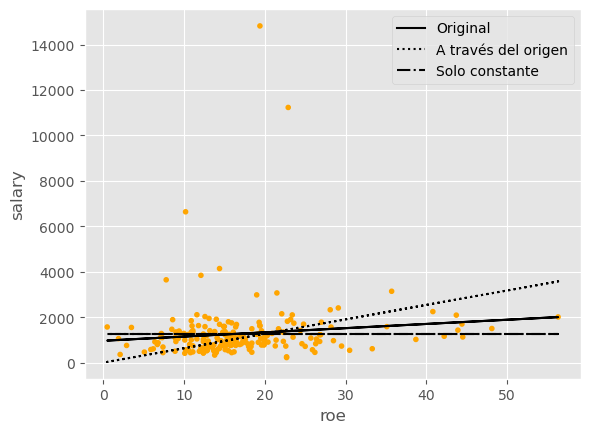

In [15]:
# Graficamos las diferencias
# promedio y:
sal_mean = np.mean(ceosal1['salary'])
print(f'sal_mean: {sal_mean}\n')

# scatter plot and fitted values:
plt.scatter('roe', 'salary', data=ceosal1, color='orange', marker='.',
linestyle='', label='')
plt.plot(ceosal1['roe'], results1.fittedvalues, color='black',
linestyle='-', label='Original')
plt.plot(ceosal1['roe'], results2.fittedvalues, color='black',
linestyle=':', label='A través del origen')
plt.plot(ceosal1['roe'], results3.fittedvalues, color='black',
linestyle='-.', label='Solo constante')
plt.ylabel('salary')
plt.xlabel('roe')
plt.legend()

# Data: Wage and Education

## Wooldridge, Ejemplo 2.4

Para este ejemplo se usará el conjunto de datos <font color = red> WAGE1 </font>, tal cual lo hace el ejemplo 2.4 "Wage and Education":

$$\text{wage} = \beta_0 + \beta_1 \text{education} + u$$

donde $\text{wage}$ es el salario en dólares por hora de la fuerza laboral y $\text{education}$ son los años de educación.

In [16]:
# Importamos los datos
wage1 = woo.dataWoo('wage1')
wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [17]:
# Regresion MCO
reg = smf.ols(formula='wage ~ educ', data=wage1) #instanciamos la clase
results = reg.fit() #usamos el método fit
b = results.params #usamos una propiedad
print(f'b: \n{b}\n')

b: 
Intercept   -0.904852
educ         0.541359
dtype: float64



La interpretación de estos resutados son sencillos, un año adicional de educación se asocia con un aumento del salario típico de aproximadamente 54 centavos por hora.
Igualmente podemos usar los comandos vistos en el anterior "data set" para poder explorar diversos métodos y propiedades creadas al momento de instanciar la clase en "results"

In [18]:
# Obtener los valores predichos y los residuales:
wage_hat = results.fittedvalues
u_hat = results.resid

In [19]:
# Generamos una tabla
table = pd.DataFrame({'educ': wage1['educ'],
                      'wage': wage1['wage'],
                      'wage_hat': wage_hat,
                      'u_hat': u_hat})
print(f'table.head(15): \n{table.head(15)}\n')

table.head(15): 
    educ       wage  wage_hat      u_hat
0     11   3.100000  5.050100  -1.950100
1     12   3.240000  5.591459  -2.351459
2     11   3.000000  5.050100  -2.050100
3      8   6.000000  3.426022   2.573978
4     12   5.300000  5.591459  -0.291459
5     16   8.750000  7.756896   0.993104
6     18  11.250000  8.839615   2.410385
7     12   5.000000  5.591459  -0.591459
8     12   3.600000  5.591459  -1.991460
9     17  18.180000  8.298256   9.881745
10    16   6.250000  7.756896  -1.506896
11    13   8.130000  6.132819   1.997181
12    12   8.770000  5.591459   3.178541
13    12   5.500000  5.591459  -0.091459
14    12  22.200001  5.591459  16.608541



In [20]:
# usamos el método summary para obtener una tabla más rica de los resultados
print(f' Usando results.summary(): \n{results.summary()}\n') #usamos el método summary

 Usando results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           2.78e-22
Time:                        22:22:03   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049   

## Wooldridge, Ejemplo 2.10:

Este ejemplo es idóneo para hacer un modelo regresión semilogaritmico, para ello solo debemos modificar los datos dentro de la instancia de clase que se desea crear

In [21]:
reg = smf.ols(formula='np.log(wage) ~ educ', data = wage1) 
results = reg.fit()
b = results.params
print(f'parameters of a semilog: \n{b}\n')

parameters of a semilog: 
Intercept    0.583773
educ         0.082744
dtype: float64



La especificación semilogarítmica implica que si la persona tiene un año adicional de educación, los salarios subiran aproximadamente un 8.3%.

# Data: Voting Outcomes and Campaign Expenditures

## Wooldridge, Ejemplo 2.5

De igual modo, para este ejemplo se usará el conjunto de datos <font color = red> VOTE1 </font>, tal cual lo hace el ejemplo 2.5 "Voting Outcomes and Campaign Expenditures":

$$\text{voteA} = \beta_0 + \beta_1 \text{shareA} + u$$

Sea $\text{voteA}$ el porcentaje de votos obtenidos por el candidato A y $\text{shareA}$ el porcentaje total de los gastos de campaña atribuido al candidato A.

In [22]:
# importamos los datos
vote1 = woo.dataWoo('vote1')

In [23]:
# regresion MCO
reg = smf.ols(formula='voteA ~ shareA', data=vote1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

b: 
Intercept    26.812214
shareA        0.463827
dtype: float64



Este resultado nos indica que si aumenta el gasto del candidato A en un punto porcentual, él obtendrá aproximadamente medio punto porcentual (0.4638) más del total de votos.

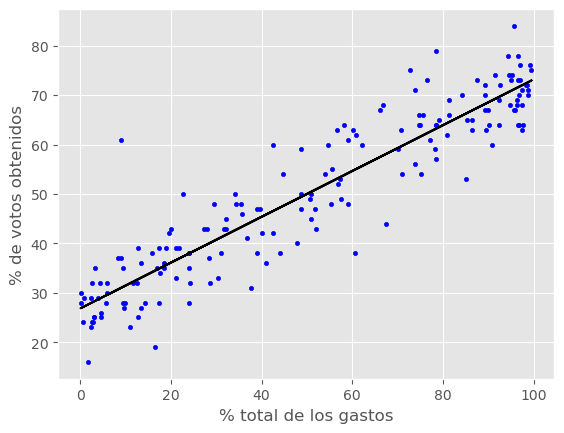

In [24]:
# Graficamos
plt.scatter('shareA', 'voteA', data= vote1, color='blue', marker='.')
plt.plot(vote1['shareA'], results.fittedvalues, color='black', linestyle='-')
plt.ylabel('% de votos obtenidos')
plt.xlabel('% total de los gastos')
plt.show()

##  Wooldridge, Ejemplo 2.9

In [25]:
print(f' Usando results.summary(): \n{results.summary()}\n')

 Usando results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           6.63e-74
Time:                        22:22:03   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122   

# Data: Student Math Performance and the School Lunch Program

Esta parte del cuaderno se basa en la sección 2.5 de Wooldridge, donde se analizan cinco supuestos bajo los cuales los estimadores de los parámetros MCO tienen propiedades deseables. Las cuales son:
- **SRLS1:** Linealidad en los parámetros del modelo de regresión poblacional, $y = \beta_0 + \beta_1 x + u$
- **SRLS2:** Muestreo aleatorio de tamaño $n$, para $\left\{(x,y): i= 1, ...,n\right\}$
- **SRLS3:** Volatilidad en la variable explicativa muestral, $x_1, ..., x_n$
- **SRLS4:** Media condicional cero, $E(x|u) = 0$
- **SRLS5:** Homocedasticidad, $\text{Var}(u|x) = \sigma^2$

Con estos supuestos se puede demostrar el insesgamiento de los parámetros y la varianza mínima de estos.

Debido a que las fórmulas para la varianza muestral involucran la varianza del término de error, también tenemos que
estimarlo usando el estimador insesgado:
$$\hat{\sigma}^2 = \frac{1}{n-k} \sum_{i=1}^n \hat{u}^2 = \frac{n-1}{n-k} \text{Var}(\hat{u}_i)$$
Donde para este cuaderno $k=2$, que es el número de parámetros a estimar. $\text{Var}(\hat{u}_i)$ es la varianza muestral. Y con este estimador podemos sacar el **Error Estandar de la Regresion** $\hat{\sigma} = \sqrt{\hat{\sigma}^2}$

Los errores estándar (SE) de los estimadores son:

\begin{align}
se(\beta_0) = \sqrt{\frac{\sigma^2 n^{-1} \sum_{i=1}^n x_i^2}{\sum_{i=1}^n (x_i - \bar{x})^2}} \\
se(\beta_1) = \sqrt{\frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2)}}
\end{align}

En Python, obviamente podemos hacer los cálculos de las ecuaciones 2.15 a 2.16 explícitamente. Pero el método "summary" para resultados de regresión lineal ya comtiene estos resultados. Para ejemplificar esto usaremos <font color = red> MEAP93 </font>, donde se realizará una regresión del puntaje de desempeño en matemáticas de las escuelas en función de la proporción de estudiantes.

In [26]:
# Importamos los datas
meap93 = woo.dataWoo('meap93')
meap93

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.400000,1862,112.599998,5765,37498.0,7420,2.900000,89.199997,56.400002,67.900002,44918.0,10.712594,8.659560,7.529407,4.723842,0.197877,10.532043
1,2.300000,11355,101.199997,6601,48722.0,10370,1.300000,91.400002,42.700001,65.300003,59092.0,10.986851,8.794976,9.337414,4.617099,0.212840,10.793886
2,2.700000,7685,114.000000,6834,44541.0,7313,3.500000,91.400002,43.799999,54.299999,51854.0,10.856188,8.829665,8.947025,4.736198,0.164186,10.704165
3,3.400000,1148,85.400002,3586,31566.0,5989,3.600000,86.599998,25.299999,60.000000,37555.0,10.533562,8.184793,7.045776,4.447346,0.189729,10.359836
4,3.400000,1572,96.099998,3847,29781.0,5545,0.000000,100.000000,15.300000,65.800003,35326.0,10.472375,8.255049,7.360104,4.565389,0.186193,10.301626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,60.900002,1689,78.400002,5380,41856.0,9468,35.799999,23.500000,7.000000,11.200000,51324.0,10.845914,8.590444,7.431892,4.361824,0.226204,10.641991
404,61.099998,2631,100.699997,5088,35020.0,7655,17.500000,61.099998,8.100000,22.700001,42675.0,10.661368,8.534640,7.875119,4.612146,0.218589,10.463675
405,73.800003,4024,85.199997,3942,32678.0,6220,8.700000,83.300003,11.500000,26.799999,38898.0,10.568698,8.279444,8.300032,4.445002,0.190342,10.394458
406,74.400002,850,122.400002,5029,29210.0,6513,1.600000,91.900002,9.500000,9.700000,35723.0,10.483550,8.522977,6.745236,4.807294,0.222972,10.282267


In [27]:
# estimamos el modelo y guardamos el resultado en "results":
reg = smf.ols(formula='math10 ~ lnchprg', data=meap93)
results = reg.fit()

In [28]:
# Guardamos el número de observaciones
n = results.nobs

In [29]:
# SER:
u_hat_var = np.var(results.resid, ddof=1)
SER = np.sqrt(u_hat_var) * np.sqrt((n - 1) / (n - 2)) #Error estandar de la regresión
print(f'SER: {SER}\n')
# SE para b0 & b1, respectivamente:
lnchprg_sq_mean = np.mean(meap93['lnchprg'] ** 2)
lnchprg_var = np.var(meap93['lnchprg'], ddof=1)
b1_se = SER / (np.sqrt(lnchprg_var)                  # Error estandar de b1
                * np.sqrt(n - 1)) * np.sqrt(lnchprg_sq_mean)
b0_se = SER / (np.sqrt(lnchprg_var) * np.sqrt(n - 1)) #Error estandar de b0
print(f'b1_se: \n{b1_se}\n')
print(f'b0_se: \n{b0_se}\n')
# calculo automatico:
print(f'results.summary(): \n{results.summary()}\n')

SER: 9.565938459482766

b1_se: 
0.9975823856755026

b0_se: 
0.03483933425836965

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Thu, 22 Feb 2024   Prob (F-statistic):           2.75e-18
Time:                        22:22:04   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------